# Linear Regression and Gradient Descent
## 1. Load the dataset
Import necessary packages and set parameters.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

# paremeters
epoch = 300
eta = 0.4

Load the dataset and divide dataset into training set and validation set.

In [17]:
def get_data():
    data_path = './housing_scale'
    X, y = load_svmlight_file(data_path)
    X = X.toarray()
    b = np.ones((X.shape[0], 1))
    X = np.concatenate((b, X), axis=1)
    y = np.expand_dims(y, axis=1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=66)
    return X_train, X_val, y_train, y_val

X_train, X_val, y_train, y_val = get_data()

print('Training data set contains {} examples with {} dimensions'.format(X_train.shape[0], X_train.shape[1]))
print('Validation data set contains {} examples with {} dimensions'.format(X_val.shape[0], X_val.shape[1]))

Training data set contains 354 examples with 14 dimensions
Validation data set contains 152 examples with 14 dimensions


## 2. Initalize Linear Regression model parameters

In [18]:
n, dim = X_train.shape
val_n = X_val.shape[0]
W = np.random.randn(dim, 1)

## 3. Optimization
Define function to plot loss.

In [19]:
def plot(train_loss, val_loss):
    fig, ax = plt.subplots()
    ax.plot(train_loss, label='train', linewidth=2.0)
    ax.plot(val_loss, label='validation', linewidth=2.0)
    ax.set(xlabel='Iteration', ylabel='Loss')
    ax.grid()
    ax.set_ylim([0,100])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    plt.show()

Update model parameters using gradient descent
#### Loss function:
$$L = \frac{1}{2N}\Vert W^Tx_i - y_i \Vert_2^2$$
#### The gradient with respect to the weight:
$$\frac{\partial L}{\partial W} = X^T(XW - y)$$
#### Using GD to update the weight:
$$W_{t+1} = W_t - \eta \cdot g ,$$
where the positive scalar $\eta$ is the learning rate.

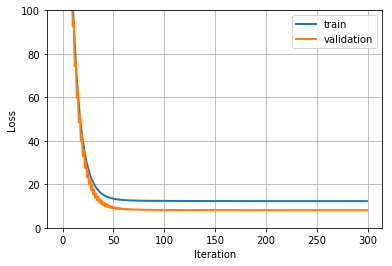

The minimum validation loss is: 8.099609617296656


In [20]:
def GD_train(X_train, y_train, X_val, y_val, W):
    train_loss = np.zeros((epoch, ))
    val_loss = np.zeros((epoch, ))
    for i in range(epoch):
        train_loss[i] = 1 / (2.0 * n) * np.dot(np.transpose(np.dot(X_train, W) - y_train), np.dot(X_train, W) - y_train)
        val_loss[i] = 1 / (2.0 * val_n) * np.dot(np.transpose(np.dot(X_val, W) - y_val), np.dot(X_val, W) - y_val)
        W_grad = np.dot(X_train.T, X_train.dot(W) - y_train) / n
        W = W - eta * W_grad
    return train_loss, val_loss

train_loss, val_loss = GD_train(X_train, y_train, X_val, y_val, np.copy(W))
plot(train_loss, val_loss)
print('The minimum validation loss is: {}'.format(np.min(val_loss).item()))

## 4. Investigate the sensitiveness of the parametes
### 4.1 Investigate the sensitiveness of $\eta$

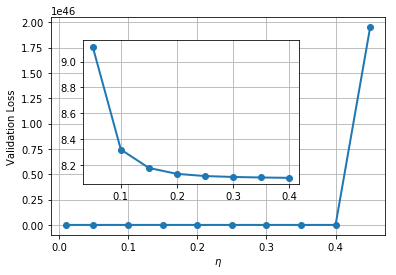

In [21]:
epoch = 300
eta_list = np.arange(0.1, 0.5, 0.05)
eta_list = np.insert(eta_list, 0, [0.01, 0.05])
eta_list_detail = eta_list[1:-1]

num_eta = eta_list.size
val_loss_last = np.zeros((num_eta, ))
for i in range(num_eta):
    eta = eta_list[i].item()
    train_loss, val_loss = GD_train(X_train, y_train, X_val, y_val, np.copy(W))
    val_loss_last[i] = val_loss[-1]

val_loss_last_detail = val_loss_last[1:-1]

plt.plot(eta_list, val_loss_last, 'o-', linewidth=2.0)
plt.xlabel(r'$\eta$')
plt.ylabel('Validation Loss')
plt.grid()

a = plt.axes([0.2, 0.3, .5, .5])
plt.plot(eta_list_detail, val_loss_last_detail, 'o-', linewidth=2.0)
plt.grid()
plt.show()

### 4.2 Investigate the sensitiveness of epoch

Epoch list:
[ 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900
 950]


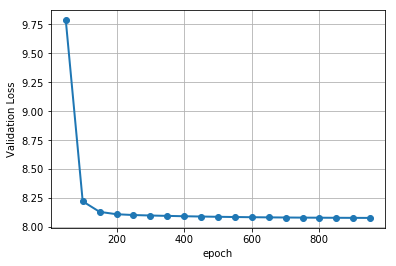

In [22]:
eta = 0.4
epoch_list = np.arange(50, 1000, 50)
print('Epoch list:')
print(epoch_list)

num_epoch_in_list = epoch_list.size
val_loss_last = np.zeros((num_epoch_in_list, ))
for i in range(num_epoch_in_list):
    epoch = epoch_list[i].item()
    train_loss, val_loss = GD_train(X_train, y_train, X_val, y_val, np.copy(W))
    val_loss_last[i] = val_loss[-1]

plt.plot(epoch_list, val_loss_last, 'o-', linewidth=2.0)
plt.xlabel('epoch')
plt.ylabel('Validation Loss')
plt.grid()

# a = plt.axes([0.2, 0.3, .5, .5])
# plt.plot(eta_list_detail, val_loss_last_detail, 'o-', linewidth=2.0)
# plt.grid()
# plt.show()